# Data Science Lifecycle: Vehicle MPG Analysis
This notebook explores which vehicle features most contribute to lower Miles Per Gallon (MPG) using the seaborn 'mpg' dataset.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Define the Question
**Which feature(s) of a vehicle most contribute to lower Miles Per Gallon?**

In [2]:
# Load the dataset
df = sns.load_dataset("mpg")

In [4]:
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Explore Data Types

In [8]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


### Visualize Cylinders

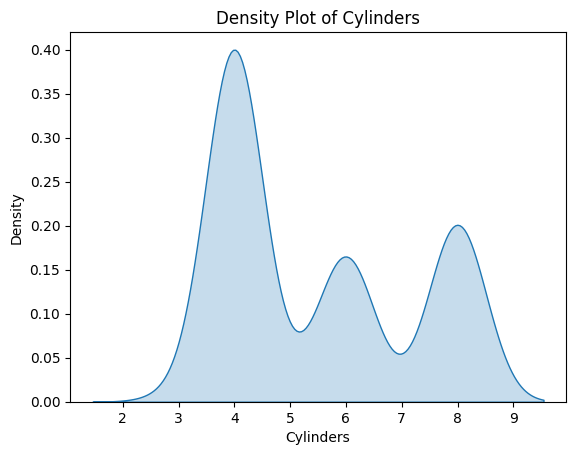

In [9]:
sns.kdeplot(df['cylinders'], fill=True)
plt.title('Density Plot of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Density')
plt.show()

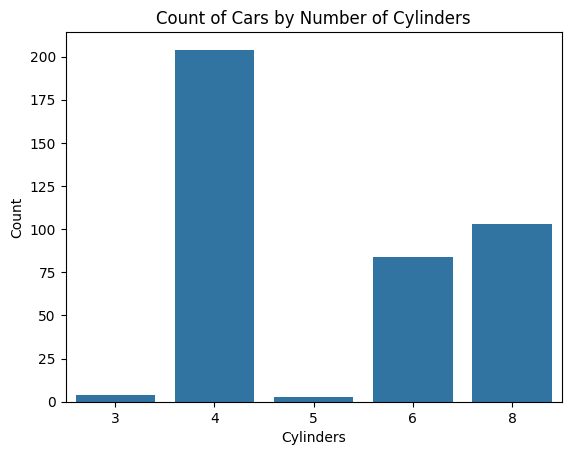

In [10]:
sns.countplot(x='cylinders', data=df)
plt.title('Count of Cars by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

In [11]:
df['cylinders'] = df['cylinders'].astype('category')
df['model_year'] = df['model_year'].astype('category')

In [12]:
print(df.dtypes)

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year      category
origin            object
name              object
dtype: object


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

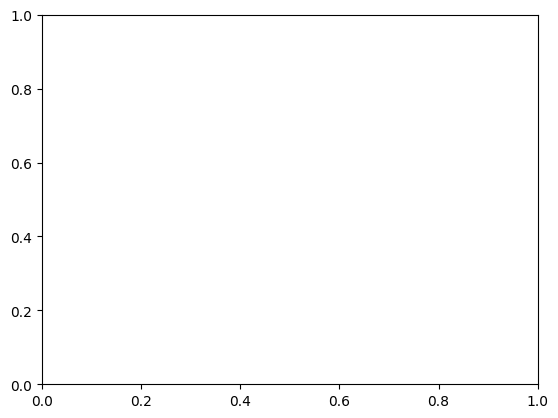

In [13]:
sns.kdeplot(df['cylinders'], fill=True)
plt.title('Density Plot of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Density')
plt.show()

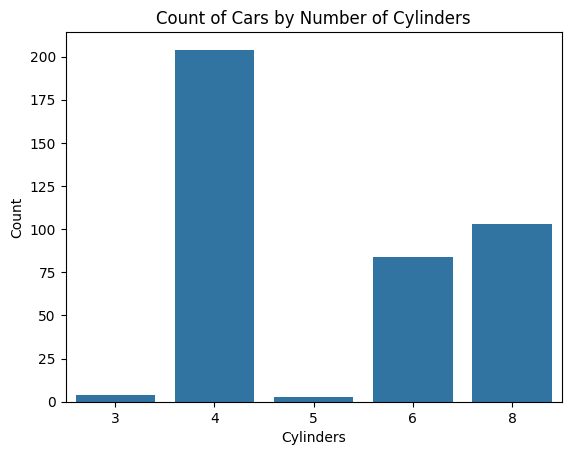

In [14]:
sns.countplot(x='cylinders', data=df)
plt.title('Count of Cars by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

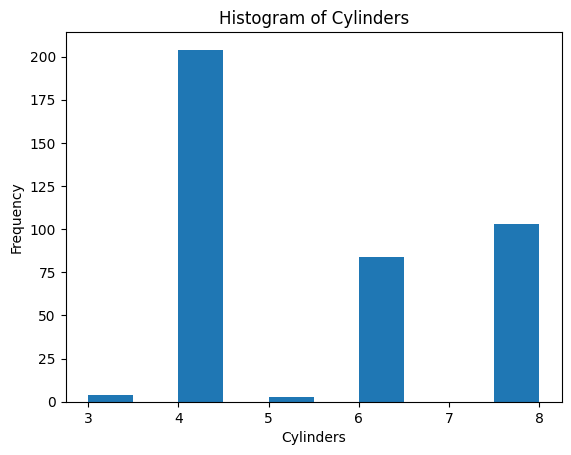

In [15]:
plt.hist(df['cylinders'])
plt.title('Histogram of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

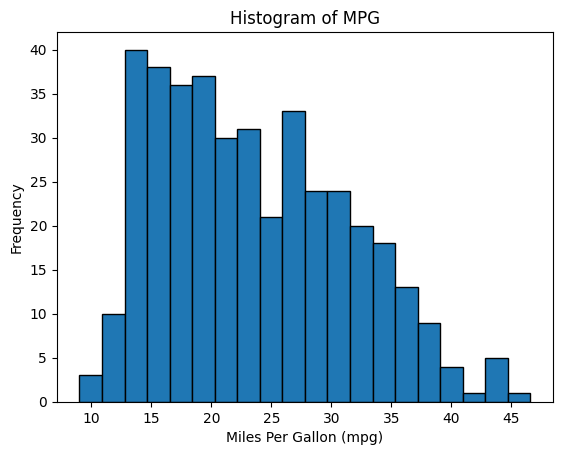

In [16]:
plt.hist(df['mpg'], bins=20, edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')
plt.show()

### Check for Missing Data

In [17]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


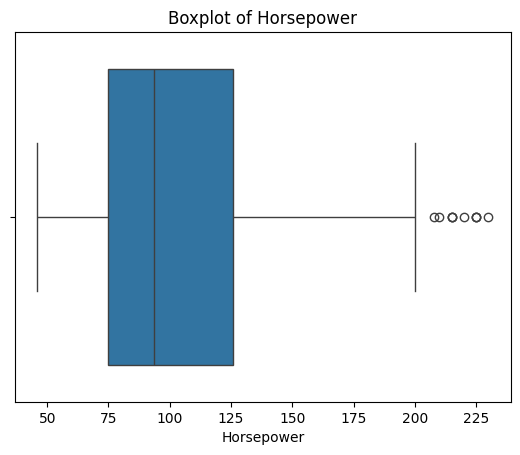

In [18]:
sns.boxplot(x='horsepower', data=df)
plt.title('Boxplot of Horsepower')
plt.xlabel('Horsepower')
plt.show()

In [19]:
print(df[df['horsepower'].isnull()])

      mpg cylinders  displacement  horsepower  weight  acceleration  \
32   25.0         4          98.0         NaN    2046          19.0   
126  21.0         6         200.0         NaN    2875          17.0   
330  40.9         4          85.0         NaN    1835          17.3   
336  23.6         4         140.0         NaN    2905          14.3   
354  34.5         4         100.0         NaN    2320          15.8   
374  23.0         4         151.0         NaN    3035          20.5   

    model_year  origin                  name  
32          71     usa            ford pinto  
126         74     usa         ford maverick  
330         80  europe  renault lecar deluxe  
336         80     usa    ford mustang cobra  
354         81  europe           renault 18i  
374         82     usa        amc concord dl  


In [20]:
missing_hp = df['horsepower'].isnull()
print(df[missing_hp].groupby(['cylinders', 'model_year', 'origin']).size())
print('Summary for rows with missing horsepower:')
print(df[missing_hp].describe(include='all'))
print('Summary for rows without missing horsepower:')
print(df[~missing_hp].describe(include='all'))

cylinders  model_year  origin
3          70          europe    0
                       usa       0
           71          europe    0
                       usa       0
           72          europe    0
                                ..
8          80          usa       0
           81          europe    0
                       usa       0
           82          europe    0
                       usa       0
Length: 130, dtype: int64
Summary for rows with missing horsepower:
              mpg  cylinders  displacement  horsepower       weight  \
count    6.000000        6.0       6.00000         0.0     6.000000   
unique        NaN        2.0           NaN         NaN          NaN   
top           NaN        4.0           NaN         NaN          NaN   
freq          NaN        5.0           NaN         NaN          NaN   
mean    28.000000        NaN     129.00000         NaN  2502.666667   
std      7.886951        NaN      43.32205         NaN   504.296209   
min     21.000000   

/tmp/ipykernel_16713/1399002736.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[missing_hp].groupby(['cylinders', 'model_year', 'origin']).size())


In [21]:
means_missing = df[missing_hp].mean(numeric_only=True)
means_not_missing = df[~missing_hp].mean(numeric_only=True)
comparison_df = pd.DataFrame({
    'Missing Horsepower': means_missing,
    'Not Missing Horsepower': means_not_missing
})
print(comparison_df)

              Missing Horsepower  Not Missing Horsepower
mpg                    28.000000               23.445918
displacement          129.000000              194.411990
horsepower                   NaN              104.469388
weight               2502.666667             2977.584184
acceleration           17.316667               15.541327


We really don't see much of a pattern, which is good. This likely means there is no systemic problem with the data collections process. It also means we can likely just delete these rows.

In [22]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    category
 7   origin        392 non-null    object  
 8   name          392 non-null    object  
dtypes: category(2), float64(4), int64(1), object(2)
memory usage: 26.1+ KB
None


### Correlation Analysis

In [23]:
correlations = df.corr(numeric_only=True)['mpg'].sort_values()
print('Correlation of variables with mpg (lower means more negative correlation):')
print(correlations)

Correlation of variables with mpg (lower means more negative correlation):
weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
acceleration    0.423329
mpg             1.000000
Name: mpg, dtype: float64


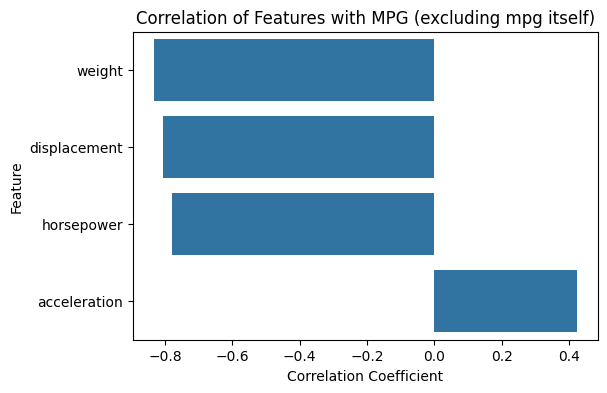

In [24]:
correlations_no_mpg = correlations.drop('mpg')
plt.figure(figsize=(6, 4))
sns.barplot(x=correlations_no_mpg.values, y=correlations_no_mpg.index, orient='h')
plt.title('Correlation of Features with MPG (excluding mpg itself)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

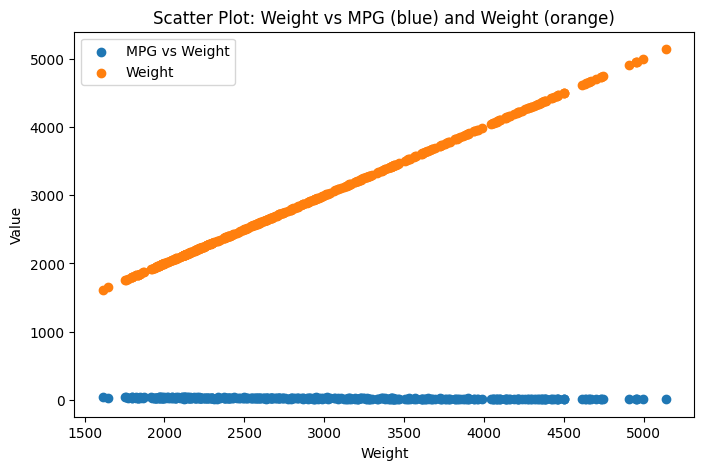

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(df['weight'], df['mpg'], c='tab:blue', label='MPG vs Weight')
plt.scatter(df['weight'], df['weight'], c='tab:orange', label='Weight')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.title('Scatter Plot: Weight vs MPG (blue) and Weight (orange)')
plt.legend()
plt.show()

Why doesn't this really work?

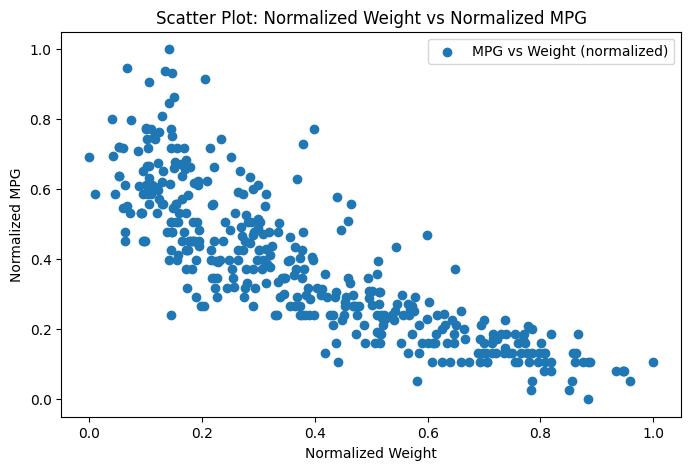

In [26]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
plt.figure(figsize=(8, 5))
plt.scatter(df_normalized['weight'], df_normalized['mpg'], c='tab:blue', label='MPG vs Weight (normalized)')
plt.xlabel('Normalized Weight')
plt.ylabel('Normalized MPG')
plt.title('Scatter Plot: Normalized Weight vs Normalized MPG')
plt.legend()
plt.show()

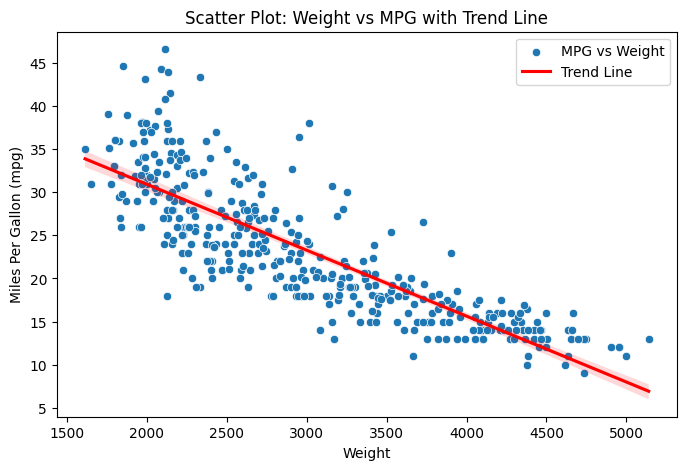

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='weight', y='mpg', data=df, color='tab:blue', label='MPG vs Weight')
sns.regplot(x='weight', y='mpg', data=df, scatter=False, color='red', label='Trend Line')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('Scatter Plot: Weight vs MPG with Trend Line')
plt.legend()
plt.show()

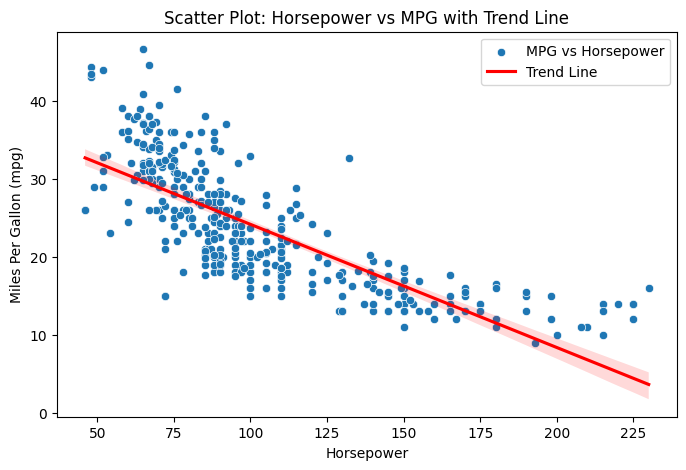

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='mpg', data=df, color='tab:blue', label='MPG vs Horsepower')
sns.regplot(x='horsepower', y='mpg', data=df, scatter=False, color='red', label='Trend Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('Scatter Plot: Horsepower vs MPG with Trend Line')
plt.legend()
plt.show()

What about the categorical feature 'number of cylinders'? Do we think more cylinders means worse MPG?

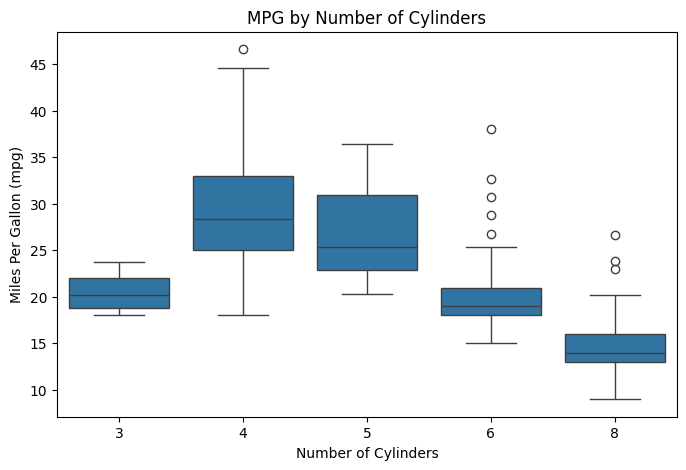

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

In [30]:
# Linear Regression Model
X = df.drop(columns=['name', 'origin', 'mpg'])
X = pd.get_dummies(X, drop_first=True)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse:.2f}')
print(f'Test R^2: {r2:.2f}')
coef_table = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_table)

Test MSE: 6.95
Test R^2: 0.86
          Feature  Coefficient
17  model_year_80     9.373718
19  model_year_82     7.375131
7     cylinders_8     7.365053
5     cylinders_5     7.118355
18  model_year_81     6.754829
4     cylinders_4     6.615821
16  model_year_79     4.554458
6     cylinders_6     4.385247
15  model_year_78     3.344877
14  model_year_77     3.139082
11  model_year_74     1.658979
13  model_year_76     1.608279
8   model_year_71     1.380858
12  model_year_75     0.843749
10  model_year_73    -0.530790
9   model_year_72    -0.254046
1      horsepower    -0.029981
2          weight    -0.005149
0    displacement    -0.003683
3    acceleration    -0.000091


The regression coefficient for horsepower is approximately -0.03. This means that, holding all other features constant, each additional unit increase in horsepower is associated with a decrease of about 0.03 miles per gallon (mpg) in fuel efficiency.

In [31]:
import plotly.express as px
fig_std = px.scatter_3d(df_normalized, x='weight', y='horsepower', z='mpg',
                        color='mpg', color_continuous_scale='Viridis',
                        title='3D Scatter Plot of Normalized MPG, Weight, and Horsepower')
fig_std.update_layout(scene=dict(
    xaxis_title='Normalized Weight',
    yaxis_title='Normalized Horsepower',
    zaxis_title='Normalized MPG'
,
,


SyntaxError: '(' was never closed (3557585584.py, line 5)